# Homework 2: Perceptrons



This assignment is due on Canvas by **11:59pm on Friday, April 15th**. 
Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.
Your solutions to computational questions should include any specified Python code and results 
as well as written commentary on your conclusions.
Remember that you are encouraged to discuss the problems with your instructors and classmates, 
but **you must write all code and solutions on your own**. For a refresher on the course **Collaboration Policy** click [here](https://canvas.uchicago.edu/courses/42240).

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda with Python 3.9. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 
- Extra credit questions will not make your homework total scores overflow i.e., not exceed 40% in the final grade. But you can use extra credit in one homework to cover another.

**Acknowledgment** : Chris Ketelsen


In [321]:
import math
import pickle
import gzip
import numpy as np
import pandas
import matplotlib.pylab as plt
%matplotlib inline

## [100 points] Problem 1 - Perceptron Training

Consider a binary classification problem on the following dataset:

| x1   | x2         | x3      | y| 
|:------:|:------------:| :-----------:|---:|
|0|0|0|-1|
|0|0|1|1|
|0|1|0|1|
|1|0|0|1|
|0|1|1|-1|
|1|1|0|-1|
|1|0|1|-1|
|1|1|1|1|

We are going to experiment with the Perceptron algorithm in this problem.

### Part 1 [10 points]
Complete the `perceptron_train` function and report the results.  
[Note: for this part you should **not** randomly shuffle the order of the data]

In [322]:
# Do not change - unless needed
data = np.array([
    [0, 0, 0, 1, 0, 1, 1, 1],
    [0, 0, 1, 0, 1, 1, 0, 1],
    [0, 1, 0, 0, 1, 0, 1, 1],
    [-1, 1, 1, 1, -1, -1, -1, 1]
])
data = np.transpose(data)
# Initialize the weights and bias (note that we use a non-standard initialization here).
weights = np.array([0, 0.5, 0.5])
bias = 1

In [323]:
def perceptron_train(data, weights, bias):
    """
    apply transformation and update weights and bias
    :type X: array
    :type y: int
    :type weights: array
    :type bias : int
    :rtype: weights, bias, number of mistakes
    """
    mistakes_count = 0
    for row in data:
        X = np.array(row[:3])
        y = row[-1]
        a = np.dot(weights, X) + bias
        if a * y <= 0:
            weights += y * X
            bias += y
            mistakes_count += 1
    return weights, bias, mistakes_count

#### Part 1 A [5 points]
Report the weights, bias, and number of mistakes after the first epoch.

In [324]:
### Do not change or remove this code
weights, bias, number_of_mistakes = perceptron_train(data, weights, bias)
print(f'weights: {weights}, bias: {bias}, mistakes: {number_of_mistakes}')

weights: [ 1.  -0.5  0.5], bias: 0, mistakes: 5


In [325]:
# for grading - ignore

#### Part 1 B [5 points]:
Run the perceptron training for 50 more epochs with the updated weights and report the weights, bias and number of mistakes.

In [326]:
epochs = 50
for i in range(epochs):
    weights, bias, number_of_mistakes = perceptron_train(data, weights, bias)

print(f'weights: {weights}, bias: {bias}, mistakes: {number_of_mistakes}')

weights: [1.  0.5 0.5], bias: -1, mistakes: 4


In [327]:
# for grading - ignore

### Part 2 [10 points] 
Is it possible that your Perceptron classifier would 
ever perfectly classify all training examples after more passes of the Perceptron Algorithm?
Clearly explain your reasoning.

**[ANSWER]** First, let's recall that if we have a linearly separable data set a perceptron will always successfully classify the data. That being said, **the answer to this questions is no**, for this particular case. Given that there is no shuffling on the data, each time we train the perceptron we are adjusting the $weights$ and $bias$ for a unique data order, this will lead us to find $weights$ that are "locally" optimum for that given data order, being possible that we are missing best $weights$ only reachable by shuffling the data on each epoch. Best case scenario would be that our data is originally ordered in a way that will allow us to get the optimum $weights$ after one or few epochs, in that case the answer to the question stills no: more epochs won't improve the $weights$ and $bias$ since we have already found the optimum.


### Part 3 [10 points] 
Does the Perceptron classifier necessarily make the same number of mistakes after the first epoch if the data is presented in any other randomized order? 
    Explain your reasoning.

**[ANSWER]** No, not necessarily. The number of mistakes is going to change from epoch to epoch while the weights are adjusted (which also depends on th $margin$) during the training process. 

###  Part 4 [45 Points]:  Perceptron Classifier on random generated data

Update the Perceptron Learning Algorithm to explore the convergence on linearly separable simulated data sets with particular properties. Take a look at the `Perceptron` class below.

In [328]:
class Perceptron:
    """
    Class to fit a perceptron classifier to simulated data
    """

    def __init__(self, n=100, margin=0.1, X=None, y=None, random_state=1241):
        """
        Initializes Perceptron class.  Generates training data and sets parameters. 

        :param n: the number of training examples
        :param margin: the margin between decision boundary and data
        :param random_state: seed for random number generator 
        :param X: Input training features.  Only used for unit testing. 
        :param y: Input training labels.  Only used for unit testing. 
        """
        # initalize random seed
        np.random.seed(random_state)

        # initialize parameters
        self.n, self.M = n, margin

        # generate random simulated data
        self.X_train, self.y_train = self.gen_data()

        # only used for unit tests
        if X is not None and y is not None:
            self.X_train, self.y_train, self.n = X, y, X.shape[0]

        # initialize weights and bias
        self.w = np.array([1.0, 0.0])
        self.b = 0

        # initialize total mistake counter
        self.num_mistakes = 0

    def train(self, max_epochs=100):
        """
        Runs the Perceptron Algorithm until all training data is correctly classified. 

        :param max_epochs: Maximum number of epochs to perform before stopping.
        """
        counter = 0
        while  counter <= max_epochs:
            positions = list(range(self.n))
            np.random.shuffle(positions)
            epoch_error = 0
            for i in positions:
                a = np.dot(self.w, self.X_train[i]) + self.b
                if a * self.y_train[i] <= 0:
                    self.w += self.y_train[i] * self.X_train[i]
                    self.b += self.y_train[i]
                    self.num_mistakes += 1
                    epoch_error += 1
            if epoch_error == 0:
                break
            counter +=1
        

    def plot_model(self, decision_boundary=False):
        """
        Plots the simulated data.  Plots the learned decision boundary (#TODO) 
        """
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
        colors = ["steelblue" if yi == -
                  1 else "#a76c6e" for yi in self.y_train]
        ax.scatter(self.X_train[:, 0], self.X_train[:, 1], color=colors, s=75)
        if decision_boundary:
            xplot = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 5)
            yplot = (-self.b - self.w[0] * xplot) / self.w[1] 
            ax.plot(xplot, yplot, lw=3, color="black")
        ax.grid(alpha=0.25)
        ax.set_xlabel(r"$x_1$", fontsize=16)
        ax.set_ylabel(r"$x_2$", fontsize=16)

    def gen_data(self):
        """
        Generate random linearly separable data with given margin. 
        Note: You should not need to change this function 
        """
        flip = np.random.choice([-1, 1])
        pos_x1 = np.random.uniform(-1 / np.sqrt(2), 1 / np.sqrt(2), int(self.n / 2))
        pos_x2 = np.random.uniform(
            self.M + flip * 0.1, 1 / np.sqrt(2), int(self.n / 2))
        pos_x2[-1] = self.M + flip * 0.1
        neg_x1 = np.random.uniform(-1 / np.sqrt(2), 1 / np.sqrt(2), int(self.n / 2))
        neg_x2 = np.random.uniform(-1 / np.sqrt(2), -
                                   self.M + flip * 0.1, int(self.n / 2))
        neg_x2[-1] = -self.M + flip * 0.1
        X = np.concatenate((np.column_stack((pos_x1, pos_x2)),
                            np.column_stack((neg_x1, neg_x2))))
        X = np.dot(X, np.array(
            [[np.cos(np.pi / 6), np.sin(np.pi / 6)], [-np.sin(np.pi / 6), np.cos(np.pi / 6)]]))
        y = np.array([+1] * int(self.n / 2) + [-1] * int(self.n / 2))
        rand_order = np.random.choice(
            range(self.n), replace=False, size=self.n)
        return X[rand_order], y[rand_order]

#### Part 4 A [10 points]
The `Perceptron` class above has the capability of generating its own training data with certain properties. Execute the cell below to generate $n=100$ simulated training examples and plot them. Experiment with the `margin` parameter (good values to try are between $0.01$ and $0.4$). Explain what the `margin` parameter is doing.

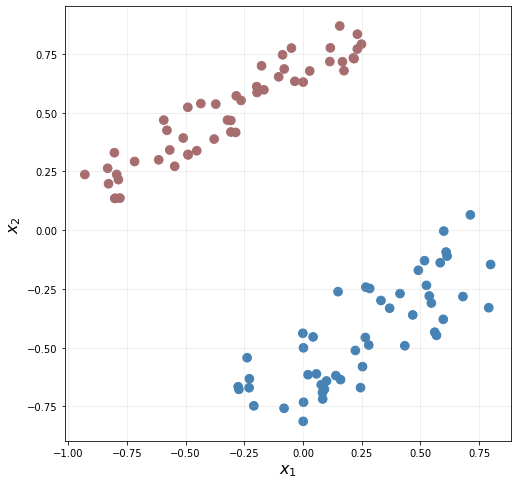

In [329]:
margin = 0.4 # subject to experiment
perc = Perceptron(n=100, margin=margin)
perc.plot_model(decision_boundary=False)

#### Part 4 B [20 points] 
Modify the `train` method in the `Perceptron` class to perform the Perceptron Learning Algorithm and learn weights ${\bf w}$ and bias $b$ that perfectly classify the linearly separable training data. Your implementation should:

- Visit all training examples in a random shuffled order over each training epoch. (**Note:** np.random.shuffle() will be helpful here)
- Terminate when you finish an epoch without making a single classification error or when you hit the maximum number of epochs.
- Use the `self.num_mistakes` counter to count the total number of classification errors over the entire training process. (**Note:** You should also have a seperate counter variable for keeping track of mistakes within each epoch.)


Notes:

You should not use Scikit-Learn's Perceptron object in your solution.
It's a good idea to implement a stopping criterion based on the `max_epochs` parameter as the first step. Later we'll look at training sets that will terminate on their own, but implementing a stopping mechanism will save you some pain in the development process.
Do not change the initial guess for the weights and bias. These values were chosen to match the example done in lecture for the unit tests.

In [330]:
from tests import tests
tests.run_test_suite('prob 1.4B', Perceptron)

TestNegMistake (tests.tests.TestPerceptron) ... ok
TestPosMistake (tests.tests.TestPerceptron) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.004s

OK


#### Part 4 C [15 points]
Modify the `plot_model` method so that it plots the learned decision boundary with the training data. Demonstrate that your method is working by training a perceptron with a margin of your choice and displaying the resulting plot. What is the equation of the learned decision boundary? (Use symbols not numbers.)


**[ANSWER]** According to Hal Daumè book, we can define the decision boundary as the set of points $x$ that achieve zero activation; in other words, the points are not clearly positive or negative. This could be seen as the set of points that draw the limit where the sign of activation, $a$, changes from -1 to +1. Formally, it could be described by $$\mathcal{B} = \Bigl\{x:\sum_d{w_d x_d = 0 \Bigr\}}$$

In this particular case, our data set has only two features, namely $x_1$ and $x_2$. We will also have to consider the $bias$, understanding that its role is to shift
the decision boundary away from the origin in the direction of *$w$*. Finally, the decision boundary equation, derived from the general expression $\mathcal{B}$, that it was implemented in the ```plot_model``` method, is:

$$w_1x_1 + w_2x_2 + b = 0$$
$$ x_2 = \frac {-b -w_1x_1}{w_2}$$

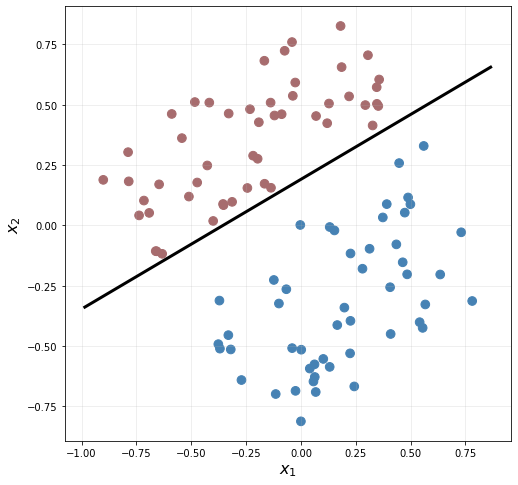

In [331]:
perc = Perceptron(n=100, margin=0.095)
perc.train()
perc.plot_model(decision_boundary=True)

### Part 5 [25 points]

Verify the theorem which states that, if you train a perceptron on linearly separable training data with margin $M > 0$ and each training point satisfies $\|{\bf x}\|_2 \leq 1$ then the Perceptron algorithm will complete after making at most $1/M^2$ classification mistakes.

Do the following to verify the above statement: 
- Train perceptrons with $n = 100$ and different margins ($M=0.3, 0.1, 0.01, 0.001,$ and $0.0001$).
- Produce a log-log plot with $1/M$ on the horizontal axis and the total numbers of mistakes on the vertical axis. 
- On the same set of axes, plot the theoretical upper bound on the number of training mistakes.

Usually we run multiple simulations and get an averaged total number of mistakes for each margin, but it is fine if you only do once.

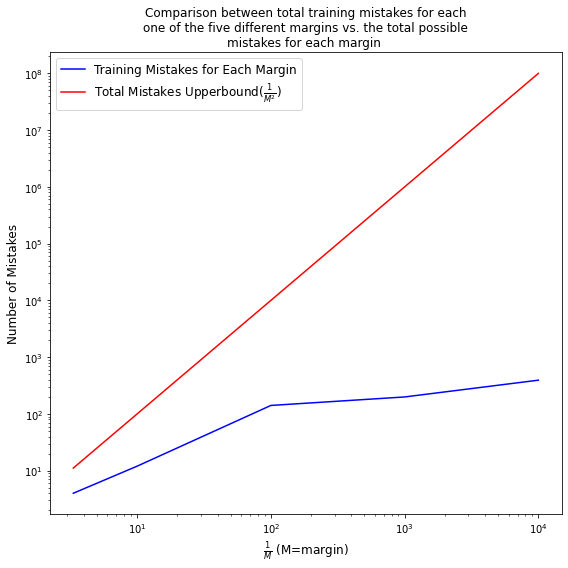

In [332]:
margins = np.array([0.3, 0.1, 0.01, 0.001, 0.0001])
perc_mistakes =[]
inv_M = []
upperbound = []

for i, perc_margin in enumerate(margins):
    perc = Perceptron(n=100, margin = perc_margin)
    perc.train()
    perc_mistakes.append(perc.num_mistakes)
    inv_M.append(1/margins[i])
    upperbound.append(1/margins[i]**2)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
ax.loglog(inv_M, perc_mistakes,'b', label="Training Mistakes for Each Margin")
ax.loglog(inv_M, upperbound, 'r',
                        label=r'Total Mistakes Upperbound($\frac{1}{M^2}$)')

ax.set_title("Comparison between total training mistakes for each\n\
one of the five different margins vs. the total possible\n\
mistakes for each margin ", fontsize='large')

ax.set_ylabel('Number of Mistakes', fontsize='large')
ax.set_xlabel(r'$\frac{1}{M}$ (M=margin)', fontsize='large')
plt.legend(loc=0, fontsize='large', fancybox=True)
plt.tight_layout()
